## Mô tả bài toán
* Bài toán traffic ligth classification là bài toán thực được áp dụng trong xe tự hành, nó là bài toán con của Traffic ligth regconition.

* Mục tiêu của bài toán là nhận một ảnh đèn giao thông (đã crop đúng vào đèn), và đầu ra là một số đại diện cho tính hiệu đèn.

* Data được thu gom từ thực tế, cắt ra từ các video camera hành trình từ youtube, cũng như được cắt từ google image.

## Link Data:

https://github.com/vatsl/TrafficLight_Detection-TensorFlowAPI#get-the-dataset

https://youtu.be/Y3HSOewZP7w

https://youtu.be/iGgogjlgE-M

https://youtu.be/EVxrZnE-uU4

https://youtu.be/abchmB6DcuE

https://youtu.be/upNHTJrEfXg

https://youtu.be/YJyexTLKo2s

https://youtu.be/QGEXZJITF58

https://youtu.be/RLjWyQmVKXg

https://youtu.be/qbR2qcbdKTA

https://youtu.be/C9J-z6JXGI0

https://youtu.be/box7pddBFdY

https://youtu.be/8USre5mc3iM

https://youtu.be/2vqWRCr5SeY

https://youtu.be/gQ6nN1ruAQU

https://youtu.be/NrgVw9UIa4I

https://youtu.be/aJ08b6R4vW0

https://youtu.be/V9MHnjaGBpA

https://youtu.be/PUPmSxGkhws

https://youtu.be/Pbnb4D_JyFI

In [ ]:
imgs_train = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/data_train.npy', allow_pickle= True)
imgs_test = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/data_test.npy', allow_pickle= True)

# Đọc dữ liệu

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


import các thư viện xử lí cần thiết

In [ ]:
import joblib # lưu - load model
import numpy as np # tính toán ma trận
import cv2 # xử lí ảnh  
from sklearn.model_selection import train_test_split
import os # thao tác với hệ thống
from tqdm import tqdm # xem tiến độ vòng lặp
import matplotlib.pyplot as plt # vẽ biểu đồ
from sklearn.metrics import classification_report # báo cáo của classifer
from sklearn import svm # model svm
from sklearn.metrics import accuracy_score # độ chính xác
from sklearn.metrics import confusion_matrix

## Load train data

In [ ]:
DIR = '/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-Traffic-Ligth/Data' #DIR chứa đường link dẫn tới folder 
paths = []
for path in os.listdir (DIR):
  path = os.path.join(DIR, path)
  paths.append(path)


def read_img(paths): #Hàm đọc file Data từ google drive
  imgs = []
  label = []
  for path in tqdm (os.listdir(paths)):
    path = os.path.join(paths, path) #Có đường dẫn tới ảnh
    img = cv2.imread(path)
    img = cv2.resize (img, (100, 100))
    imgs.append (np.array(img))
    if 'Yellow' in path:
      label.append(1)
    if 'Red' in path:
      label.append (0)
    if 'Green' in path:
      label.append(2)
  return imgs, label

imgs_train = []
labels_train = []
for i in range (len(paths)):
  img, label = read_img(paths[i])
  imgs_train.append (img) #list chứa ảnh đèn giao thông
  labels_train.append (label) #list chứ nhãn của ảnh đèn giao thông

# 0 - đèn đỏ 
# 1 - đèn vàng
# 2 - đèn xanh

100%|██████████| 295/295 [00:01<00:00, 285.34it/s]


In [ ]:
# Lưu lại data train
np.save ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/data_train.npy', imgs_train)

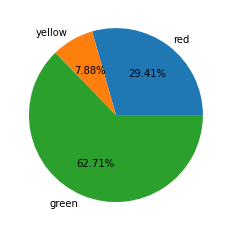

In [ ]:
# Visualize sự phân bố dữ liệu
count0 = 0
count1 = 0
count2 = 0
for i in labels_training:
  if (i == 0):
    count0 += 1
  if (i == 1):
    count1 += 1
  if (i == 2):
    count2 += 1
count = []
count.append(count0)
count.append(count1)
count.append(count2)
plt.pie(count, labels=['red', 'yellow', 'green'], autopct='%1.2f%%')
plt.show()  

## Load test data (data từ thành phố Hồ Chí Minh)

In [ ]:
DIR = '/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-Traffic-Ligth/Test_set_Tuchup' #DIR chứa đường link dẫn tới folder 
paths = []
for path in os.listdir (DIR):
  path = os.path.join(DIR, path)
  paths.append(path)

def read_img(paths, index):
  imgs = []
  label = []
  for path in tqdm (os.listdir(paths)):
    path = os.path.join(paths, path)
    img = cv2.imread(path)
    img = cv2.resize (img, (100, 100), cv2.INTER_CUBIC)
    imgs.append (np.array(img))
    if 'yellow' in path:
      label.append(1)
    if 'red' in path:
      label.append (0)
    if 'green' in path:
      label.append(2)
  return imgs, label

imgs_test = []
labels_test = []
for i in range (len(paths)):
  img, label = read_img(paths[i], i)
  imgs_test.append (img)
  labels_test.append (label)

100%|██████████| 53/53 [00:00<00:00, 213.62it/s]


In [ ]:
# Lưu lại data test
np.save ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/data_test.npy', imgs_test)

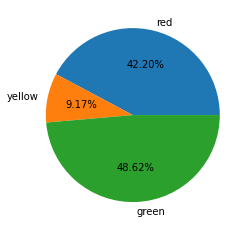

In [ ]:
# Visualize sự phân bố dữ liệu 
count0 = 0
count1 = 0
count2 = 0
for i in labels_testing:
  if (i == 0):
    count0 += 1
  if (i == 1):
    count1 += 1
  if (i == 2):
    count2 += 1
count = []
count.append(count0)
count.append(count1)
count.append(count2)

plt.pie(count, labels=['red', 'yellow', 'green'], autopct='%1.2f%%')
plt.show()  

# Features extract

* Ta sẽ dùng features về màu sắc để xem xét xem đèn đó là màu gì

* Dùng phương pháp segmentation theo từng màu sắc:

    * Phương pháp này ta sẽ chọn ra 2 ngưỡng chặng trên và dưới của từng màu, tất cả những pixel nào nằm trong 2 ngưỡng này sẽ thuộc về màu đó
    * Hàm feature_rgb bên dưới sẽ nhận đầu vào là 1 ảnh rgb, để đầu ra sẽ là một ảnh đã được thể hiện màu sắc của vùng ta quan tâm trên đèn


## Hàm features extract (cho 1 ảnh)

In [ ]:
#tham khảo ý tưởng: https://realpython.com/python-opencv-color-spaces/
def feature_rgb(rgb_image):
    # Làm mờ ảnh
    rgb_image = cv2.blur(rgb_image, ksize = (7,7))
    #cân bằng sáng
    # hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    # hsv[:,:,0] = cv2.equalizeHist(hsv[:,:,0])
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    

    image = np.copy(hsv)
    # Ta sẽ set các ngưỡng màu cho green, red, và yellow
    #green
    lower_green = np.array([50, 25, 25])
    upper_green = np.array([86, 255, 255])
    #yellow
    lower_yellow = np.array([20,100,120]) 
    upper_yellow = np.array([60,255,255])
    #red
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    
    # tạo ra các mask màu cho ảnh, ta sẽ lấy tất cả các pixel nằm trong khoảng chặn trên dưới
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    
    # đưa màu của ta về thành 1 giá trị duy nhất, vì các pixel sẽ có giá trị khác nhau nằm trong khoảng chặng trên dưới, ta cần đưa
    # toàn bộ các pixel trên về thành một màu duy nhất (tương đương đỏ xanh vàng)
    masked_image = np.zeros((image.shape[1],image.shape[0],3), np.uint8) #tạo ra một "ảnh"  có 3 channel
    # masked_image chứa 3 channel tương đương 1 ảnh RGB, qua mỗi channel xem xem, nếu pixel đó có giá trị khác 0 thì ta sẽ đưa nó về một màu duy nhất
    # tương ứng với màu của  channel đó
    masked_image[mask_red != 0] = [255, 0, 0]
    masked_image[mask_green != 0] = [0, 255, 0]
    masked_image[mask_yellow != 0] = [255, 255, 0]
    result = masked_image.flatten()
    
    return result

In [ ]:
#hàm để visualize features dưới dạng ảnh
def feature_rgb(rgb_image):
    rgb_image = cv2.blur(rgb_image, ksize = (7,7))
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    
    image = np.copy(hsv)
    #green
    lower_green = np.array([50, 25, 25])
    upper_green = np.array([86, 255, 255])
    #yellow
    lower_yellow = np.array([20,100,120]) 
    upper_yellow = np.array([60,255,255])
    #red
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    
    
    masked_image = np.zeros((image.shape[1],image.shape[0],3), np.uint8) 
    masked_image[mask_red != 0] = [255, 0, 0]
    masked_image[mask_green != 0] = [0, 255, 0]
    masked_image[mask_yellow != 0] = [255, 255, 0]
    
    return masked_red

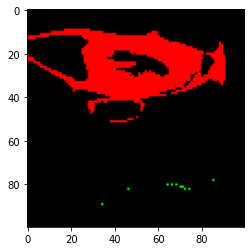

In [ ]:
# visualize thử 1 ảnh sau khi rút trích đặc trưng (ảnh của cây đèn đỏ)
img = cv2.imread ('/content/red.PNG')
img = cv2.resize(img, (100,100), cv2.INTER_CUBIC)
_img = feature_rgb (img)
plt.imshow(_img)

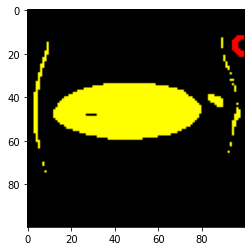

In [ ]:
#ảnh cây đèn vàng
img = cv2.imread ('/content/yellow.png')
_img = cv2.resize (img, (100,100), cv2.INTER_CUBIC)
_img = feature_rgb(_img) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(100,100), cv2.INTER_CUBIC)
plt.imshow (_img)

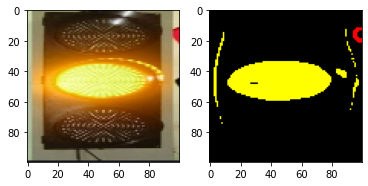

In [ ]:
# anh truoc vao sau khi duoc rut trich dac trung
plt.subplot (1,2,1)
plt.imshow (img)
plt.subplot(1,2,2)
plt.imshow (_img)

## Hàm features extract cho một bộ data



In [ ]:
# Hàm rút trích đặc trưng cho toàn bộ Data
def Features_extract_for_dict(data, Label):
  features = []
  for i in range(3):
    for j in data[i]:
      feature = feature_rgb(j)
      features.append(feature)
  features_train = np.array(features)
  labels = []
  for i in range (3):
    for j in Label[i]:
      labels.append (j)
  labels = np.array (labels)
  return features, labels

In [ ]:
# feature extract cho tap train
features_training, labels_training = Features_extract_for_dict(imgs_train, labels_train)

In [ ]:
# feature extract cho tap test
features_testing, labels_testing = Features_extract_for_dict(imgs_test, labels_test)

In [ ]:
# Save lại features va label sau khi đã rút trích đặc trưng xong
np.save ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/labels_train.npy', labels_training)
np.save ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/features_train.npy', features_training)
np.save ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/labels_test.npy', labels_testing)
np.save ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/features_test.npy', features_testing)

# Thử nghiệm trên 3 thuật toán
  * Naive Bayes
  * KNN
  * svm

In [ ]:
# Load dữ liệu
features_training = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/features_train.npy',allow_pickle=True)
features_testing = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/features_test.npy',allow_pickle=True)
labels_training = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/labels_train.npy',allow_pickle=True)
labels_testing = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/labels_test.npy',allow_pickle=True)

In [ ]:
 from sklearn.naive_bayes import GaussianNB
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn import svm

In [ ]:
model_NB = GaussianNB()
model_KNN = KNeighborsClassifier()
model_svm = svm.SVC()

In [ ]:
model_NB.fit (features_training, labels_training)
model_KNN.fit (features_training, labels_training)
model_svm.fit (features_training, labels_training)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predict tren tap test
re1_test = model_NB.predict(features_testing)
re2_test = model_KNN.predict(features_testing)
re3_test = model_svm.predict(features_testing)

In [ ]:
#predict tren tap train
re1_train = model_NB.predict(features_training)
re2_train = model_KNN.predict(features_training)
re3_train = model_svm.predict(features_training)

In [ ]:
report_NB_test = classification_report(labels_testing, re1_test)
report_KNN_test = classification_report(labels_testing, re2_test) 
report_svm_test = classification_report(labels_testing, re3_test)
report_NB_train = classification_report(labels_training, re1_train)
report_KNN_train = classification_report(labels_training, re2_train) 
report_svm_train = classification_report(labels_training, re3_train)

In [ ]:
cfm_NB_test = confusion_matrix (labels_testing, re1_test)
cfm_KNN_test = confusion_matrix (labels_testing, re2_test)
cfm_svm_test = confusion_matrix (labels_testing, re3_test)
cfm_NB_train = confusion_matrix (labels_training, re1_train)
cfm_KNN_train = confusion_matrix (labels_training, re2_train)
cfm_svm_train = confusion_matrix (labels_training, re3_train)

In [ ]:
print ('cfm Naive bayes on test set')
print (cfm_NB_test)
print ('cfm Naive bayes on train set')
print (cfm_NB_train)
print ('report Naive bayes on test set')
print (report_NB_test)
print ('report Naive bayes on train set')
print (report_NB_train)

cfm Naive bayes on test set
[[23  3 20]
 [ 4  6  0]
 [ 6  0 47]]
cfm Naive bayes on train set
[[152  11 132]
 [  0  56  23]
 [  0   1 628]]
report Naive bayes on test set
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        46
           1       0.67      0.60      0.63        10
           2       0.70      0.89      0.78        53

    accuracy                           0.70       109
   macro avg       0.69      0.66      0.67       109
weighted avg       0.70      0.70      0.68       109

report Naive bayes on train set
              precision    recall  f1-score   support

           0       1.00      0.52      0.68       295
           1       0.82      0.71      0.76        79
           2       0.80      1.00      0.89       629

    accuracy                           0.83      1003
   macro avg       0.88      0.74      0.78      1003
weighted avg       0.86      0.83      0.82      1003



In [ ]:
print ('cfm KNN on test set')
print (cfm_KNN_test)
print ('cfm KNN on train set')
print (cfm_KNN_train)
print ('report KNN on test set')
print (report_KNN_test)
print ('report KNN on train set')
print (report_KNN_train)

cfm KNN on test set
[[22  4 20]
 [ 2  8  0]
 [ 4  0 49]]
cfm KNN on train set
[[150   1 144]
 [  2  52  25]
 [  0   0 629]]
report KNN on test set
              precision    recall  f1-score   support

           0       0.79      0.48      0.59        46
           1       0.67      0.80      0.73        10
           2       0.71      0.92      0.80        53

    accuracy                           0.72       109
   macro avg       0.72      0.73      0.71       109
weighted avg       0.74      0.72      0.71       109

report KNN on train set
              precision    recall  f1-score   support

           0       0.99      0.51      0.67       295
           1       0.98      0.66      0.79        79
           2       0.79      1.00      0.88       629

    accuracy                           0.83      1003
   macro avg       0.92      0.72      0.78      1003
weighted avg       0.86      0.83      0.81      1003



In [ ]:
print ('cfm svm on test set')
print (cfm_svm_test)
print ('cfm svm on train set')
print (cfm_svm_train)
print ('report svm on test set')
print (report_svm_test)
print ('report svm on train set')
print (report_svm_train)

cfm svm on test set
[[20  0 26]
 [ 9  1  0]
 [46  0  7]]
cfm svm on train set
[[132   0 163]
 [  0  45  34]
 [  0   0 629]]
report svm on test set
              precision    recall  f1-score   support

           0       0.27      0.43      0.33        46
           1       1.00      0.10      0.18        10
           2       0.21      0.13      0.16        53

    accuracy                           0.26       109
   macro avg       0.49      0.22      0.23       109
weighted avg       0.31      0.26      0.24       109

report svm on train set
              precision    recall  f1-score   support

           0       1.00      0.45      0.62       295
           1       1.00      0.57      0.73        79
           2       0.76      1.00      0.86       629

    accuracy                           0.80      1003
   macro avg       0.92      0.67      0.74      1003
weighted avg       0.85      0.80      0.78      1003



Nhận xét:

Ta thấy ở model Naive Bayes cùng với model KNN sự chênh lệch giữa accuracy và f1 score
khi kiểm thử trên tập train cũng như tập test khoảng 10%
Nhưng đối với model svm khoảng cách này lên đến khoảng 60% 
Ta có thể thấy được model svm có thể là đã bị overfitting

In [ ]:
joblib.dump (model_KNN, '/content/gdrive/My Drive/Colab Notebooks/Máy học/Model/model_KNN_beforetuning.pkl')

['/content/gdrive/My Drive/Colab Notebooks/Máy học/Model/model_KNN_beforetuning.pkl']

# Tuning hyperparameters

In [ ]:
features_training = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/features_train.npy',allow_pickle=True)
features_testing = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/features_test.npy',allow_pickle=True)
labels_training = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/labels_train.npy',allow_pickle=True)
labels_testing = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/labels_test.npy',allow_pickle=True)

## Tuning KNN

In [ ]:
# Sử dụng grid search CV để tuning model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load dữ liệu
features_training = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/features_train.npy',allow_pickle=True)
features_testing = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/features_test.npy',allow_pickle=True)
labels_training = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/labels_train.npy',allow_pickle=True)
labels_testing = np.load ('/content/gdrive/My Drive/Colab Notebooks/Máy học/Data-dict/labels_test.npy',allow_pickle=True)

In [ ]:
param_grid = {'n_neighbors': [5, 7, 12, 20], 'weights': ['uniform', 'distance'], 'p' : [1, 2]}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=2, return_train_score=True)
grid.fit(features_training, labels_training)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] n_neighbors=5, p=1, weights=uniform .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. n_neighbors=5, p=1, weights=uniform, total=  11.4s
[CV] n_neighbors=5, p=1, weights=uniform .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.6s remaining:    0.0s


[CV] .............. n_neighbors=5, p=1, weights=uniform, total=  11.3s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] .............. n_neighbors=5, p=1, weights=uniform, total=  11.2s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] .............. n_neighbors=5, p=1, weights=uniform, total=  10.2s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] .............. n_neighbors=5, p=1, weights=uniform, total=   9.7s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV] ............. n_neighbors=5, p=1, weights=distance, total=  11.2s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV] ............. n_neighbors=5, p=1, weights=distance, total=  11.3s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV] ............. n_neighbors=5, p=1, weights=distance, total=  11.2s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 64.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 7, 12, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=2)

In [ ]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [ ]:
re_train = grid.predict(features_training)
re_test = grid.predict(features_testing)

In [ ]:
cfm_train = confusion_matrix (labels_training, re_train)
cfm_test = confusion_matrix (labels_testing, re_test)
report_train = classification_report (labels_training, re_train)
report_test = classification_report (labels_testing, re_test)

In [ ]:
print ('cfm test set')
print (cfm_test)
print ('cfm train set')
print (cfm_train)
print ('report test set')
print (report_test)
print ('report train set')
print (report_train)

cfm test set
[[22  4 20]
 [ 2  8  0]
 [ 4  0 49]]
cfm train set
[[150   1 144]
 [  2  52  25]
 [  0   0 629]]
report test set
              precision    recall  f1-score   support

           0       0.79      0.48      0.59        46
           1       0.67      0.80      0.73        10
           2       0.71      0.92      0.80        53

    accuracy                           0.72       109
   macro avg       0.72      0.73      0.71       109
weighted avg       0.74      0.72      0.71       109

report train set
              precision    recall  f1-score   support

           0       0.99      0.51      0.67       295
           1       0.98      0.66      0.79        79
           2       0.79      1.00      0.88       629

    accuracy                           0.83      1003
   macro avg       0.92      0.72      0.78      1003
weighted avg       0.86      0.83      0.81      1003



In [ ]:
joblib.dump (grid, '/content/gdrive/My Drive/Colab Notebooks/Máy học/Model')

# Training model bằng ảnh thuần túy (không rút trích đặc trưng)

In [ ]:
data_train = np.load('/content/gdrive/My Drive/Colab Notebooks/Traffic ligth/data_train.npy', allow_pickle = True)
labels_training = np.load('/content/gdrive/My Drive/Colab Notebooks/Traffic ligth/labels_train.npy', allow_pickle = True)
data_test = np.load('/content/gdrive/My Drive/Colab Notebooks/Traffic ligth/data_test.npy', allow_pickle = True)
labels_testing= np.load('/content/gdrive/My Drive/Colab Notebooks/Traffic ligth/labels_test.npy', allow_pickle = True)

In [ ]:
_data_train = []
for i in data_train:
  for j in i:
    j = cv2.blur(j, ksize = (7,7))
    j = j.flatten()
    _data_train.append (j)

_data_test = []
for i in data_test:
  for j in i:
    j = cv2.blur(j, ksize = (7,7))
    j = j.flatten()
    _data_test.append (j)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
model_NB = GaussianNB()
model_KNN = KNeighborsClassifier()
model_svm = svm.SVC()

In [ ]:
model_NB.fit (_data_train, labels_training)
model_KNN.fit (_data_train, labels_training)
model_svm.fit (_data_train, labels_training)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predict tren tap test
re1_test = model_NB.predict(_data_test)
re2_test = model_KNN.predict(_data_test)
re3_test = model_svm.predict(_data_test)

In [ ]:
#predict tren tap train
re1_train = model_NB.predict(_data_train)
re2_train = model_KNN.predict(_data_train)
re3_train = model_svm.predict(_data_train)

In [ ]:
report_NB_test = classification_report(labels_testing, re1_test)
report_KNN_test = classification_report(labels_testing, re2_test) 
report_svm_test = classification_report(labels_testing, re3_test)
report_NB_train = classification_report(labels_training, re1_train)
report_KNN_train = classification_report(labels_training, re2_train) 
report_svm_train = classification_report(labels_training, re3_train)

In [ ]:
cfm_NB_test = confusion_matrix (labels_testing, re1_test)
cfm_KNN_test = confusion_matrix (labels_testing, re2_test)
cfm_svm_test = confusion_matrix (labels_testing, re3_test)
cfm_NB_train = confusion_matrix (labels_training, re1_train)
cfm_KNN_train = confusion_matrix (labels_training, re2_train)
cfm_svm_train = confusion_matrix (labels_training, re3_train)

In [ ]:
print ('cfm Naive bayes on test set')
print (cfm_NB_test)
print ('cfm Naive bayes on train set')
print (cfm_NB_train)
print ('report Naive bayes on test set')
print (report_NB_test)
print ('report Naive bayes on train set')
print (report_NB_train)

cfm Naive bayes on test set
[[39  5  2]
 [ 3  6  1]
 [10  2 41]]
cfm Naive bayes on train set
[[231   2  62]
 [  2  68   9]
 [ 64  39 526]]
report Naive bayes on test set
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        46
           1       0.46      0.60      0.52        10
           2       0.93      0.77      0.85        53

    accuracy                           0.79       109
   macro avg       0.71      0.74      0.72       109
weighted avg       0.81      0.79      0.79       109

report Naive bayes on train set
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       295
           1       0.62      0.86      0.72        79
           2       0.88      0.84      0.86       629

    accuracy                           0.82      1003
   macro avg       0.76      0.83      0.79      1003
weighted avg       0.83      0.82      0.82      1003



In [ ]:
print ('cfm KNN on test set')
print (cfm_KNN_test)
print ('cfm KNN on train set')
print (cfm_KNN_train)
print ('report KNN on test set')
print (report_KNN_test)
print ('report KNN on train set')
print (report_KNN_train)

cfm KNN on test set
[[36  1  9]
 [ 3  6  1]
 [ 1  0 52]]
cfm KNN on train set
[[277   0  18]
 [  5  64  10]
 [  0   1 628]]
report KNN on test set
              precision    recall  f1-score   support

           0       0.90      0.78      0.84        46
           1       0.86      0.60      0.71        10
           2       0.84      0.98      0.90        53

    accuracy                           0.86       109
   macro avg       0.87      0.79      0.82       109
weighted avg       0.87      0.86      0.86       109

report KNN on train set
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       295
           1       0.98      0.81      0.89        79
           2       0.96      1.00      0.98       629

    accuracy                           0.97      1003
   macro avg       0.97      0.92      0.94      1003
weighted avg       0.97      0.97      0.97      1003



In [ ]:
print ('cfm svm on test set')
print (cfm_svm_test)
print ('cfm svm on train set')
print (cfm_svm_train)
print ('report svm on test set')
print (report_svm_test)
print ('report svm on train set')
print (report_svm_train)

cfm svm on test set
[[45  0  1]
 [ 2  7  1]
 [ 0  0 53]]
cfm svm on train set
[[292   0   3]
 [  0  79   0]
 [  0   0 629]]
report svm on test set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        46
           1       1.00      0.70      0.82        10
           2       0.96      1.00      0.98        53

    accuracy                           0.96       109
   macro avg       0.97      0.89      0.92       109
weighted avg       0.96      0.96      0.96       109

report svm on train set
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       295
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00       629

    accuracy                           1.00      1003
   macro avg       1.00      1.00      1.00      1003
weighted avg       1.00      1.00      1.00      1003



In [ ]:
# Lưu lại model
joblib.dump(model_svm, '/content/gdrive/My Drive/Colab Notebooks/Máy học/Model/model_SVM_nonfeaturesex.pkl')

['/content/gdrive/My Drive/Colab Notebooks/Máy học/Model/model_SVM_nonfeaturesex.pkl']

# Phân loại màu đèn giao thông bằng cách lập trình truyền thống:

Ý tưởng: 
* Sau khi rút trích đặc trưng, giá trị được trả về đó là một ảnh chỉ chứa màu sắc mà ta quan tâm (đỏ, xanh, vàng).
* Ta sẽ đếm số lượng pixel tương ứng với từng màu. Vì đèn chỉ mang một trạng thái đối với mỗi ảnh, cho nên nếu pixel của màu nào có số lượng lớn nhất, thì đèn sẽ là màu đó. 

In [ ]:
#tham khảo ý tưởng: https://realpython.com/python-opencv-color-spaces/
def feature_rgb(rgb_image):
    # Làm mờ ảnh
    rgb_image = cv2.blur(rgb_image, ksize = (7,7))
    #cân bằng sáng
    # hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    # hsv[:,:,0] = cv2.equalizeHist(hsv[:,:,0])
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    

    image = np.copy(hsv)
    # Ta sẽ set các ngưỡng màu cho green, red, và yellow
    #green
    lower_green = np.array([50, 25, 25])
    upper_green = np.array([86, 255, 255])
    #yellow
    lower_yellow = np.array([20,100,120]) 
    upper_yellow = np.array([60,255,255])
    #red
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    
    # tạo ra các mask màu cho ảnh, ta sẽ lấy tất cả các pixel nằm trong khoảng chặn trên dưới
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    
    # đưa màu của ta về thành 1 giá trị duy nhất, vì các pixel sẽ có giá trị khác nhau nằm trong khoảng chặng trên dưới, ta cần đưa
    # toàn bộ các pixel trên về thành một màu duy nhất (tương đương đỏ xanh vàng)
    masked_image = np.zeros((image.shape[1],image.shape[0],3), np.uint8) #tạo ra một mảng masked chứa các giá trị 0
    # masked_image chứa 3 channel tương đương 1 ảnh RGB, qua mỗi channel xem xem, nếu pixel đó có giá trị khác 0 thì ta sẽ đưa nó về màu cần thiết luôn
    masked_image[mask_red != 0] = [255, 0, 0]
    masked_image[mask_green != 0] = [0, 255, 0]
    masked_image[mask_yellow != 0] = [255, 255, 0]
    
    return masked_image

In [ ]:
# Ham predict cho mot ảnh 
def predict (image_bgr):
  # Rút trích đặc trưng ảnh
  img = feature_rgb(image_bgr)
  # Tạo biến đếm số pixel cho mỗi màu
  count_R = 0
  count_G = 0
  count_Y = 0
  # Lấy ra tất cả pixel của channel R và G
  # Lí do là vì màu đỏ có giá trị R = 255, 2 giá trị còn lại = 0
  # màu vàng có giá trị R = 255, G = 255, giá trị còn lại bằng 0
  # màu xanh lá có giá trị G = 255, giá trị còn lại bằng 0
  R = img[:,:,0]
  G = img[:,:,1]
  # Lặp qua tất cả các pixel của 2 channel
  for i in range (100):
    for j in range (100):
      # Nếu ở vị trí (i,j) ở channel đỏ, pixel có giá trị bằng với vị trí (i,j ở channel xanh) và bằng 255 thì nó sẽ có màu vàng
      if (R[i][j] == G[i][j] and R[i][j]== 255):
        count_Y += 1
      if (R[i][j] != G[i][j] and R[i][j] == 255):
        count_R += 1
      if (R[i][j] != G[i][j] and G[i][j] == 255):
        count_G += 1
  if ((count_R - count_Y) > 0 and (count_R - count_G) > 0):
    return 0
  if ((count_Y - count_G) > 0 and (count_Y - count_R) > 0):
    return 1
  if ((count_G - count_R) > 0 and (count_G - count_Y) > 0):
    return 2
  return 0
  

In [ ]:
#predict cestesttrain set
result_train = []
for i in range (3):
  for j in imgs_train[i]:
    tmp = predict(j)
    result_train.append (tmp)

In [ ]:
#predict edict cho test set
result_test = []
for i in range (3):
  for j in imgs_test[i]:
    tmp = predict(j)
    result_test.append (tmp)

In [ ]:
cfm_train = confusion_matrix (labels_training, result_train)
cfm_test = confusion_matrix (labels_testing, result_test)
report_train = classification_report (labels_training, result_train)
report_test = classification_report (labels_testing, result_test)

In [ ]:
print ('cfm test set')
print (cfm_test)
print ('cfm train set')
print (cfm_train)
print ('report test set')
print (report_test)
print ('report train set')
print (report_train)

cfm test set
[[45  0  1]
 [ 2  8  0]
 [ 2  0 51]]
cfm train set
[[136   1 158]
 [ 50  25   4]
 [345  44 240]]
report test set
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       1.00      0.80      0.89        10
           2       0.98      0.96      0.97        53

    accuracy                           0.95       109
   macro avg       0.97      0.91      0.94       109
weighted avg       0.96      0.95      0.95       109

report train set
              precision    recall  f1-score   support

           0       0.26      0.46      0.33       295
           1       0.36      0.32      0.34        79
           2       0.60      0.38      0.47       629

    accuracy                           0.40      1003
   macro avg       0.40      0.39      0.38      1003
weighted avg       0.48      0.40      0.42      1003



# Demo

## Demo predict anh voi may hoc

In [64]:
import joblib # lưu - load model
import numpy as np # tính toán ma trận
import cv2 # xử lí ảnh  
from sklearn.model_selection import train_test_split
import os # thao tác với hệ thống
from tqdm import tqdm # xem tiến độ vòng lặp
import matplotlib.pyplot as plt # vẽ biểu đồ
from sklearn.metrics import classification_report # báo cáo của classifer
from sklearn import svm # model svm
from sklearn.metrics import accuracy_score # độ chính xác
from sklearn.metrics import confusion_matrix
#tham khảo ý tưởng: https://realpython.com/python-opencv-color-spaces/
def feature_rgb(rgb_image):
    # Làm mờ ảnh
    rgb_image = cv2.blur(rgb_image, ksize = (7,7))
    #cân bằng sáng
    # hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    # hsv[:,:,0] = cv2.equalizeHist(hsv[:,:,0])
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    

    image = np.copy(hsv)
    # Ta sẽ set các ngưỡng màu cho green, red, và yellow
    #green
    lower_green = np.array([50, 25, 25])
    upper_green = np.array([86, 255, 255])
    #yellow
    lower_yellow = np.array([20,100,120]) 
    upper_yellow = np.array([60,255,255])
    #red
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    
    # tạo ra các mask màu cho ảnh, ta sẽ lấy tất cả các pixel nằm trong khoảng chặn trên dưới
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    
    # đưa màu của ta về thành 1 giá trị duy nhất, vì các pixel sẽ có giá trị khác nhau nằm trong khoảng chặng trên dưới, ta cần đưa
    # toàn bộ các pixel trên về thành một màu duy nhất (tương đương đỏ xanh vàng)
    masked_image = np.zeros((image.shape[1],image.shape[0],3), np.uint8) #tạo ra một mảng masked chứa các giá trị 0
    # masked_image chứa 3 channel tương đương 1 ảnh RGB, qua mỗi channel xem xem, nếu pixel đó có giá trị khác 0 thì ta sẽ đưa nó về màu cần thiết luôn
    masked_image[mask_red != 0] = [255, 0, 0]
    masked_image[mask_green != 0] = [0, 255, 0]
    masked_image[mask_yellow != 0] = [255, 255, 0]
    result = masked_image.flatten()
    
    return result
def predict_demo (img_path, model_path):
  model = joblib.load(model_path)
  ori_img = cv2.imread(img_path) # Đọc ảnh cần dự đoán
  H = ori_img.shape[0] # Lấy chiều cao của ảnh
  W = ori_img.shape[1] # Lấy chiều rộng của ảnh
  img = cv2.resize(ori_img, (100,100)) #resize ảnh thành size chung của model
  _img = ori_img # copy một ảnh ori_img để hiển thị kết quả dự đoán
  _img = cv2.cvtColor(_img, cv2.COLOR_BGR2RGB)
  i = feature_rgb(img) #rút trích đặc trưng ảnh vừa đưa vào
  i = i.flatten() 
  j = [] 
  j.append (i)
  tmp = model.predict (j)
  ori_img = cv2.cvtColor (ori_img, cv2.COLOR_BGR2RGB)
  if (tmp == 0):
    tmp = 'Den do'
    color = (255,0,0)
  if (tmp == 1):
    tmp = 'Den vang'
    color = (255,255,0)
  if (tmp == 2):
    tmp = 'Den xanh'
    color = (0,255,0)
  cv2.putText(_img, tmp, (int (H/20), int (W/6)),cv2.FONT_HERSHEY_SIMPLEX,0.4, color, 2)
  # Hiển thị kết quả
  plt.subplot (1,2,1)
  plt.imshow (ori_img)
  plt.title ('Anh goc')
  plt.subplot(1,2,2)
  plt.imshow (_img)
  plt.title ('Anh duoc du doan')
  print (tmp)


Den xanh


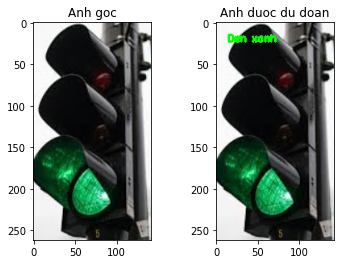

In [81]:
img_path = '/content/gdrive/My Drive/Colab Notebooks/Máy học/demo/xanh.PNGe'
model_path = '/content/gdrive/My Drive/Colab Notebooks/Máy học/Model/model_KNN_beforetuning.pkl'
predict_demo(img_path, model_path)

## Demo predict anh voi cach lap trinh truyen thong

In [71]:
import joblib # lưu - load model
import numpy as np # tính toán ma trận
import cv2 # xử lí ảnh  
from sklearn.model_selection import train_test_split
import os # thao tác với hệ thống
from tqdm import tqdm # xem tiến độ vòng lặp
import matplotlib.pyplot as plt # vẽ biểu đồ
from sklearn.metrics import classification_report # báo cáo của classifer
from sklearn import svm # model svm
from sklearn.metrics import accuracy_score # độ chính xác
from sklearn.metrics import confusion_matrix
#tham khảo ý tưởng: https://realpython.com/python-opencv-color-spaces/
def feature_rgb(rgb_image):
    # Làm mờ ảnh
    rgb_image = cv2.blur(rgb_image, ksize = (7,7))
    #cân bằng sáng
    # hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    # hsv[:,:,0] = cv2.equalizeHist(hsv[:,:,0])
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    

    image = np.copy(hsv)
    # Ta sẽ set các ngưỡng màu cho green, red, và yellow
    #green
    lower_green = np.array([50, 25, 25])
    upper_green = np.array([86, 255, 255])
    #yellow
    lower_yellow = np.array([20,100,120]) 
    upper_yellow = np.array([60,255,255])
    #red
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    
    # tạo ra các mask màu cho ảnh, ta sẽ lấy tất cả các pixel nằm trong khoảng chặn trên dưới
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    
    # đưa màu của ta về thành 1 giá trị duy nhất, vì các pixel sẽ có giá trị khác nhau nằm trong khoảng chặng trên dưới, ta cần đưa
    # toàn bộ các pixel trên về thành một màu duy nhất (tương đương đỏ xanh vàng)
    masked_image = np.zeros((image.shape[1],image.shape[0],3), np.uint8) #tạo ra một mảng masked chứa các giá trị 0
    # masked_image chứa 3 channel tương đương 1 ảnh RGB, qua mỗi channel xem xem, nếu pixel đó có giá trị khác 0 thì ta sẽ đưa nó về màu cần thiết luôn
    masked_image[mask_red != 0] = [255, 0, 0]
    masked_image[mask_green != 0] = [0, 255, 0]
    masked_image[mask_yellow != 0] = [255, 255, 0]
    
    return masked_image

def predict_without_ML (img_bgr):
  img = feature_rgb(img_bgr)
  count_R = 0
  count_G = 0
  count_Y = 0
  R = img[:,:,0]
  G = img[:,:,1]

  for i in range (100):
    for j in range (100):
      if (R[i][j] == G[i][j] and R[i][j]== 255):
        count_Y += 1
      if (R[i][j] != G[i][j] and R[i][j] == 255):
        count_R += 1
      if (R[i][j] != G[i][j] and G[i][j] == 255):
        count_G += 1

  if ((count_R - count_Y) > 0 and (count_R - count_G) > 0):
    return 0
  if ((count_Y - count_G) > 0 and (count_Y - count_R) > 0):
    return 1
  if ((count_G - count_R) > 0 and (count_G - count_Y) > 0):
    return 2
  return 0
def Predict_image (img_path):
  ori_img = cv2.imread(img_path) #đường dãn chưa link đến ảnh cần dự đoán
  H = ori_img.shape[0]
  W = ori_img.shape[1]
  im = ori_img
  img = cv2.resize(ori_img, (100,100)) #resize ảnh về 1 size duy nhất
  _img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  tmp = predict_without_ML (img)
  ori_img = cv2.cvtColor (ori_img, cv2.COLOR_BGR2RGB)
  if (tmp == 0):
    tmp = 'Den do'
    color = (255,0,0)
  if (tmp == 1):
    tmp = 'Den vang'
    color = (255,255,0)
  if (tmp == 2):
    tmp = 'Den xanh'
    color = (0,255,0)
  cv2.putText(_img, tmp, (int (H/20), int (W/2)),cv2.FONT_HERSHEY_SIMPLEX,0.6, color, 2)
  print (tmp)
  plt.subplot (1,2,1)
  plt.imshow (ori_img)
  plt.title ('Anh goc')
  plt.subplot(1,2,2)
  plt.imshow (_img)
  plt.title ('Anh duoc du doan')
  

Den xanh


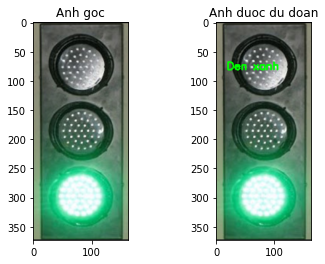

In [77]:
img_path = '/content/gdrive/My Drive/Colab Notebooks/Máy học/demo/Capture.PNG'
Predict_image (img_path)